# Project 1

**Reading Data**

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("slump_test.data")

In [4]:
data.head(5)

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [5]:
data.describe()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,52.000000,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,29.877528,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,1.000000,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,26.500000,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,52.000000,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,77.500000,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,103.000000,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


The data seems to be conistent, as there are no null entries in any input or output column

**Cleaning Data**

In [7]:
data.drop("No", axis=1, inplace=True)
data.drop("SLUMP(cm)", axis=1, inplace=True)
data.drop("FLOW(cm)", axis=1, inplace=True)

The first column i.e. serial number of each instance has been dropped, along with two other output variables which are of no interest to us.

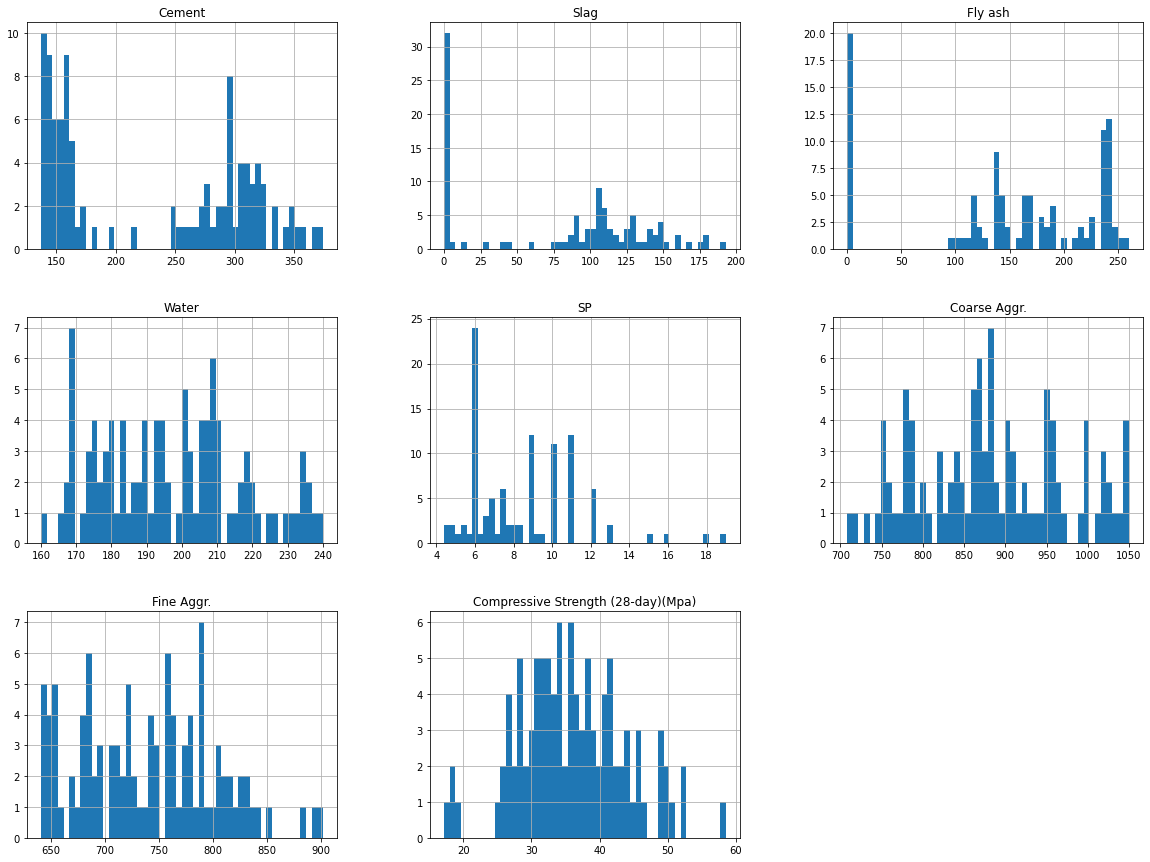

In [11]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='Cement', ylabel='Cement'>,
        <AxesSubplot:xlabel='Slag', ylabel='Cement'>,
        <AxesSubplot:xlabel='Fly ash', ylabel='Cement'>,
        <AxesSubplot:xlabel='Water', ylabel='Cement'>,
        <AxesSubplot:xlabel='SP', ylabel='Cement'>,
        <AxesSubplot:xlabel='Coarse Aggr.', ylabel='Cement'>,
        <AxesSubplot:xlabel='Fine Aggr.', ylabel='Cement'>],
       [<AxesSubplot:xlabel='Cement', ylabel='Slag'>,
        <AxesSubplot:xlabel='Slag', ylabel='Slag'>,
        <AxesSubplot:xlabel='Fly ash', ylabel='Slag'>,
        <AxesSubplot:xlabel='Water', ylabel='Slag'>,
        <AxesSubplot:xlabel='SP', ylabel='Slag'>,
        <AxesSubplot:xlabel='Coarse Aggr.', ylabel='Slag'>,
        <AxesSubplot:xlabel='Fine Aggr.', ylabel='Slag'>],
       [<AxesSubplot:xlabel='Cement', ylabel='Fly ash'>,
        <AxesSubplot:xlabel='Slag', ylabel='Fly ash'>,
        <AxesSubplot:xlabel='Fly ash', ylabel='Fly ash'>,
        <AxesSubplot:xlabel='Water', ylabel='Fly a

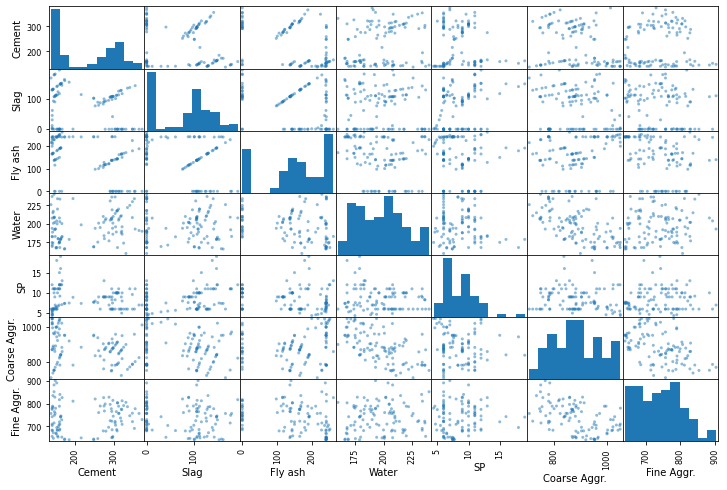

In [12]:
from pandas.plotting import scatter_matrix
attributes=["Cement","Slag","Fly ash","Water","SP","Coarse Aggr.","Fine Aggr."
]
scatter_matrix(data[attributes], figsize=(12,8))

There is not much correlation between the input variables

In [13]:
corr_matrix=data.corr()

In [15]:
corr_matrix

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.331588
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.037871
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.160684
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,-0.154484
Compressive Strength (28-day)(Mpa),0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,1.000000


The correlation matrix above shows that the input features are not much correlated to each other and therefore we need not drop them. 

In [14]:
corr_matrix["Compressive Strength (28-day)(Mpa)"].sort_values(ascending=False)

Compressive Strength (28-day)(Mpa)    1.000000
Cement                                0.445725
Fly ash                               0.444393
SP                                   -0.037871
Fine Aggr.                           -0.154484
Coarse Aggr.                         -0.160684
Water                                -0.254235
Slag                                 -0.331588
Name: Compressive Strength (28-day)(Mpa), dtype: float64

This shows that the features such as cement, fly ash and slag are much more correlated with the Compressive Strength (28-day) (Mpa) than the other features. 

**Spliting the data into Train and Test set**

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data,test_size=.2,random_state=42)

Splitting the training and test data into X and Y labels

In [24]:
X_Train=train_set.drop("Compressive Strength (28-day)(Mpa)", axis=1)
Y_Train=train_set["Compressive Strength (28-day)(Mpa)"].copy()

In [38]:
X_Test=test_set.drop("Compressive Strength (28-day)(Mpa)", axis=1)
Y_Test=test_set["Compressive Strength (28-day)(Mpa)"].copy()

Scaling the features in X labels of the training data

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

StandardScaler_Pipeline=Pipeline([
    ('std_scaler', StandardScaler())
])

stad_Scale_X_train=StandardScaler_Pipeline.fit_transform(X_Train)

**Creating the Voting Regressor**

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import VotingRegressor

lr_reg= LinearRegression()
lsr_reg=LinearSVR(epsilon=.1)
sgr_reg=SGDRegressor(max_iter=1000, tol=1e-3,penalty=None, eta0=0.1)

voting_reg=VotingRegressor(estimators=[('lr',lr_reg),('lsr', lsr_reg),('sgr', sgr_reg)])
voting_reg.fit(stad_Scale_X_train, Y_Train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('lsr', LinearSVR(epsilon=0.1)),
                            ('sgr', SGDRegressor(eta0=0.1, penalty=None))])

**Calculating the Root Mean Sqaure Error** 

In [48]:
from sklearn.metrics import mean_squared_error
import numpy as np
for reg in (lr_reg, lsr_reg, sgr_reg, voting_reg):
    reg.fit(stad_Scale_X_train, Y_Train)
    Y_Pred = reg.predict(StandardScaler_Pipeline.transform(X_Test))
    mse=mean_squared_error(Y_Test, Y_Pred)
    rmse=np.sqrt(mse)
    print(reg,":",rmse)

LinearRegression() : 2.0685228744338184
LinearSVR(epsilon=0.1) : 2.4732710564981475
SGDRegressor(eta0=0.1, penalty=None) : 2.2100185449748317
VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('lsr', LinearSVR(epsilon=0.1)),
                            ('sgr', SGDRegressor(eta0=0.1, penalty=None))]) : 2.0227485418912825


The Root Mean Square error of the voting regressor is lowest when compared to the base estimators. 

# Project 2

**Reading Data**

In [53]:
import pandas as pd
data_2 = pd.read_csv("abalone.data", header=None)
data_2.head(5)

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [54]:
data_2.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [63]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data_2[9]=ordinal_encoder.fit_transform(data_2[[0]])

Converted categorial feature into numerical feature

In [65]:
data_2.drop(0, axis=1, inplace=True)
#dropping the feature that was converted to numercial from categrical. Only numerical version of feature is retained.

In [180]:
data_2=data_2[[9,1,2,3,4,5,6,7,8]]
data_2

,9,1,2,3,4,5,6,7,8
0,2.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


The data seems to be consistent and there is no null entry in the data. The first column of the data which was categorical has been changed to categorical column. 

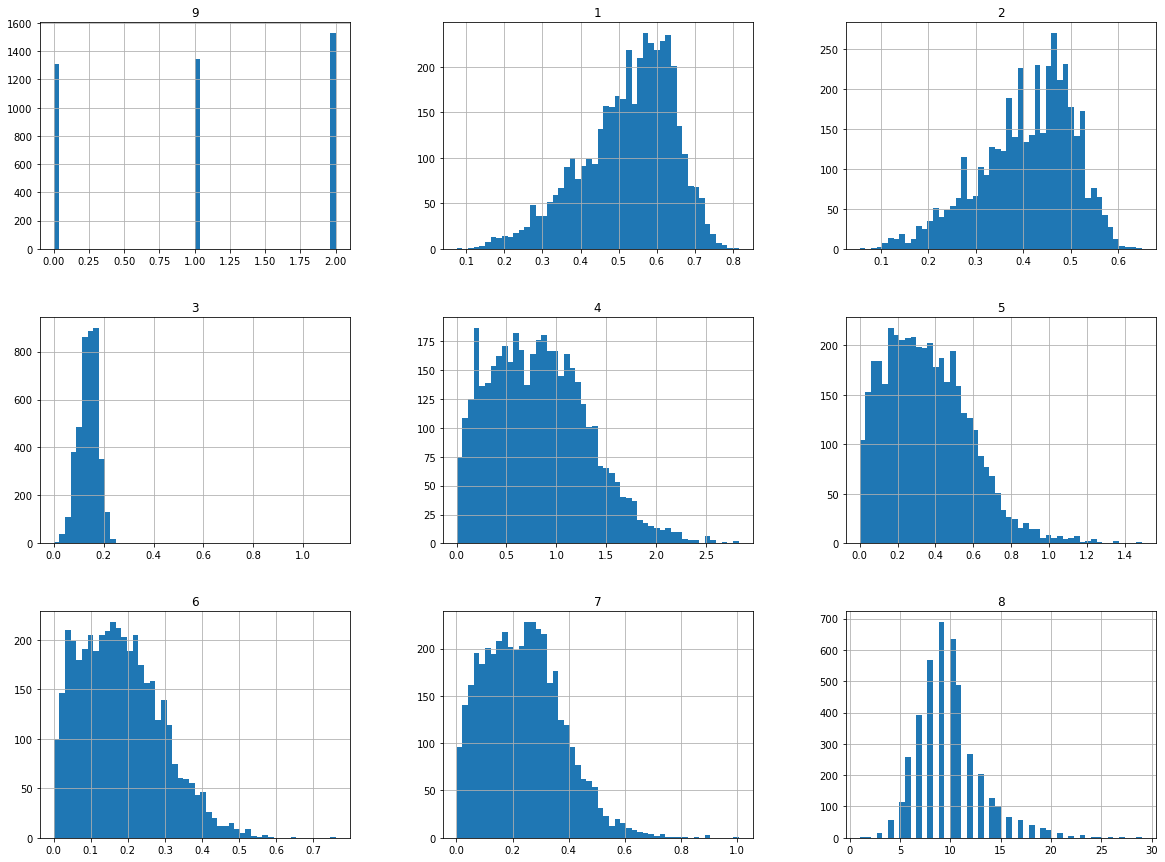

In [181]:
import matplotlib.pyplot as plt
data_2.hist(bins=50, figsize=(20,15))
plt.show()

array([[<AxesSubplot:xlabel='9', ylabel='9'>,
        <AxesSubplot:xlabel='1', ylabel='9'>,
        <AxesSubplot:xlabel='2', ylabel='9'>,
        <AxesSubplot:xlabel='3', ylabel='9'>,
        <AxesSubplot:xlabel='4', ylabel='9'>,
        <AxesSubplot:xlabel='5', ylabel='9'>,
        <AxesSubplot:xlabel='6', ylabel='9'>,
        <AxesSubplot:xlabel='7', ylabel='9'>,
        <AxesSubplot:xlabel='8', ylabel='9'>],
       [<AxesSubplot:xlabel='9', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>,
        <AxesSubplot:xlabel='4', ylabel='1'>,
        <AxesSubplot:xlabel='5', ylabel='1'>,
        <AxesSubplot:xlabel='6', ylabel='1'>,
        <AxesSubplot:xlabel='7', ylabel='1'>,
        <AxesSubplot:xlabel='8', ylabel='1'>],
       [<AxesSubplot:xlabel='9', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>,
        <AxesSubplot:xlabel='3',

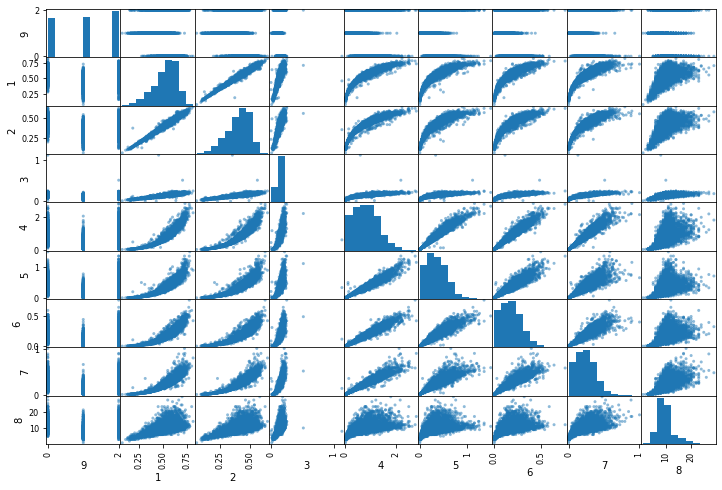

In [182]:
from pandas.plotting import scatter_matrix
attributes=[9,1,2,3,4,5,6,7,8]
scatter_matrix(data_2[attributes], figsize=(12,8))

As we can observe from the above graphs that the input vaariables are highly correlated with each other, therefore most of these features can be dropped. But we will move ahead with model building without dropping the variables.

In [183]:
corr_matrix=data_2.corr()
corr_matrix

,9,1,2,3,4,5,6,7,8
9,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
1,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
2,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
3,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
4,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
5,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
6,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
7,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
8,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


The input vairables are highly correlated with each other.

In [184]:
corr_matrix[8].sort_values(ascending=False)

8    1.000000
7    0.627574
2    0.574660
3    0.557467
1    0.556720
4    0.540390
6    0.503819
5    0.420884
9   -0.034627
Name: 8, dtype: float64

This shows that the input vairables i.e. column 7 has hgihest correlation with output variable 8. 

**Splitting the data into train and test data**

In [185]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_2,test_size=.15,random_state=42)

Splitting the training and test data into X_label and y_label

In [186]:
X_Train=train_set.drop(8, axis=1)
Y_Train=train_set[8].copy()

In [187]:
X_Test=test_set.drop(8, axis=1)
Y_Test=test_set[8].copy()

Scaling the the features in X_Train, though it is not required for Random Forrest but still doing it

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

StandardScaler_Pipeline=Pipeline([
    ('std_scaler', StandardScaler())
])

stad_Scale_X_train=StandardScaler_Pipeline.fit_transform(X_Train)

**Creating Random Forest Regressor**

In [199]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg=RandomForestRegressor(n_estimators=500,max_samples=.7, min_samples_leaf=15, bootstrap=True, n_jobs=-1)
rnd_reg.fit(stad_Scale_X_train,Y_Train)

RandomForestRegressor(max_samples=0.7, min_samples_leaf=15, n_estimators=500,
                      n_jobs=-1)

we are using the hyper parameters - **max_samples, min_samples_leaf and bootstrap** to do random patches modelling

In [200]:
y_pred_rf=rnd_reg.predict(StandardScaler_Pipeline.transform(X_Test))

scaling the X_test set using transform

In [201]:
y_pred_rf_rounded=np.rint(y_pred_rf)

Rounding the predicted Y's to nearest integer

In [202]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(Y_Test, y_pred_rf_rounded)
rmse=np.sqrt(mse)
rmse

2.1833792926484823

The root mean square error of the predicted lables is 2.18. Many other Random forrest regressors where tried with max_samples=[.5 , .6 , .75, .9] and min_samples_leaf = [10,15,20]. But the model with max_samples=.7, min_samples_leaf=15 gave lowest RMSE.

In [203]:
rnd_reg.feature_importances_

array([0.0192409 , 0.01647438, 0.02787376, 0.02334727, 0.04430558,
       0.1610299 , 0.02030349, 0.68742471])

Features/columns that are able to pass the threshold are:**5**, **7**. Therefore dropping the other features. 

**Creating the train and test set with reduced dimensions only:**

In [204]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_2,test_size=.15,random_state=42)

X_Train_red_dim=train_set.drop([1,2,3,4,6,8,9], axis=1)

Y_Train_red_dim=train_set[8].copy()

In [205]:
X_Train_red_dim.head(5)

,5,7
1815,0.5595,0.4375
1128,0.3360,0.2450
790,0.3145,0.2630
3154,0.2375,0.1750
2647,0.2940,0.1605


In [206]:
X_Test_red_dim=test_set.drop([1,2,3,4,6,8,9], axis=1)
Y_Test_red_dim=test_set[8].copy()

Scaling the the features in X_Train, though it is not required for Random Forrest but still doing it

In [207]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

StandardScaler_Pipeline=Pipeline([
    ('std_scaler', StandardScaler())
])

stad_Scale_X_train_red_dim=StandardScaler_Pipeline.fit_transform(X_Train_red_dim)

**Creating Random Forest Regressor on reduced dimension data**

In [209]:
from sklearn.ensemble import RandomForestRegressor
rnd_reg=RandomForestRegressor(n_estimators=500,max_samples=.7, min_samples_leaf=15, bootstrap=True, n_jobs=-1)
rnd_reg.fit(stad_Scale_X_train_red_dim,Y_Train_red_dim)

RandomForestRegressor(max_samples=0.7, min_samples_leaf=15, n_estimators=500,
                      n_jobs=-1)

we are using the hyper parameters - **max_samples, min_samples_leaf and bootstrap** to do random patches modelling

In [210]:
y_pred_red_dim_rf=rnd_reg.predict(StandardScaler_Pipeline.transform(X_Test_red_dim))

scaling the X_test set using transform

In [211]:
y_pred_red_dim_rf_rounded=np.rint(y_pred_red_dim_rf)

Rounding the predicted Y's to nearest integer

In [212]:
mse=mean_squared_error(Y_Test,y_pred_red_dim_rf_rounded)
rmse=np.sqrt(mse)
rmse

2.242833705450101

In [213]:
rnd_reg.feature_importances_

array([0.20646018, 0.79353982])

**Age wise root mean square error:**

In [220]:
ages_in_y_label=test_set[8].unique()

In [229]:
data_y_labels = {'predicted_Y_label_test': y_pred_red_dim_rf_rounded, 'Actual_Y_label_test': test_set[8]}
predicted_and_actual_labels_dataFrame = pd.DataFrame(data_y_labels) 

In [256]:
age_ring=[]
rmse=[]
instance_number=[]
for age in ages_in_y_label:
    a=[]
    b=[]
    for index, row in predicted_and_actual_labels_dataFrame.iterrows():
        if row[1]==age:
            a.append(row[0])
            b.append(row[1])
    root_mean_square_error=np.sqrt(mean_squared_error(b,a))
    age_ring.append(age)
    rmse.append(root_mean_square_error)
    instance_number.append(len(a))
    #print(age)
dataframe_agewise_rmse={"age/rings": age_ring, "instances in test set":instance_number,"RMSE":rmse}
rmse_dataframe=pd.DataFrame(dataframe_agewise_rmse)
    #print("Age/rings"," ",age,"has"," ",len(a)," ","instance"," ",":",root_mean_square_error)

In [262]:
rmse_dataframe.sort_values(by=['RMSE'])

,age/rings,instances in test set,RMSE
16,4,10,0.707107
15,3,3,1.000000
14,5,20,1.140175
7,10,105,1.397276
5,7,70,1.497617
0,9,103,1.561055
4,11,62,1.680054
6,6,36,1.748015
13,12,39,1.775907
1,8,77,1.776470


It can be seen that as the number of rings increase the number of instances in the test set have reduced, and so have the Root mean square error has increased. **Large rings tend to have high root mean square error when compared to smaller rings**

# Implementing Baggaing regressor

Creating the train and test sample

In [263]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_2,test_size=.15,random_state=42)

X_Train=train_set.drop(8, axis=1)
Y_Train=train_set[8].copy()

X_Test=test_set.drop(8, axis=1)
Y_Test=test_set[8].copy()

scaling the Input variables in training set

In [266]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

StandardScaler_Pipeline=Pipeline([
    ('std_scaler', StandardScaler())
])

stad_Scale_X_train=StandardScaler_Pipeline.fit_transform(X_Train)

building the model

In [279]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="rbf", gamma = 1,C=100, epsilon=.1)

Bag_reg_svm=BaggingRegressor(svm_poly_reg, n_estimators=500, bootstrap=True, max_samples=.7, n_jobs=-1)

Bag_reg_svm.fit(stad_Scale_X_train,Y_Train)

y_pred=Bag_reg_svm.predict(StandardScaler_Pipeline.transform(X_Test))

In [280]:
y_pred_rf_rounded=np.rint(y_pred)

In [281]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(Y_Test, y_pred_rf_rounded)
rmse=np.sqrt(mse)
rmse

2.2955473160150275

Many hyperparameters were tried kernel = ["poly","rbf"], c=[1,100], gamma =[1,5], epsilon = [.1] amd degree = [1,2]. But (kernel="rbf", gamma = 1,C=100, epsilon=.1) gave lowest RMSE.

The Root mean square error for the Random Forest Regressor is lower than that of SVM Regressor.